In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker

%matplotlib inline
%config InlineBackend.figur_format = 'svg'

In [2]:
sns.set_context("notebook", font_scale = 1.5, rc = {"figure.figsize": (11, 8), "axes.titlesize": 18})

plt.rcParams["figure.figsize"] = (11, 8)

In [3]:
df = pd.read_csv('cardio_train.csv', index_col = 'id', sep=';')

In [4]:
df.shape

(70000, 12)

In [5]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [6]:
#Берем только категорийные данные и, сначала переводим названия столбцов в один столбец(делаем из них значение - категории)
df1 = pd.melt(frame = df, value_vars = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'])

In [7]:
df1.head(5)

,variable,value
0,gender,2
1,gender,1
2,gender,1
3,gender,2
4,gender,1


In [8]:
#Группируем все бывшие столбцы - теперь группы и группируем по их занчению, считаем кол-во каждой категории в каждой группе
df1.groupby(['variable', 'value'])['value'].count()

variable     value
active       0        13739
             1        56261
alco         0        66236
             1         3764
cardio       0        35021
             1        34979
cholesterol  1        52385
             2         9549
             3         8066
gender       1        45530
             2        24470
gluc         1        59479
             2         5190
             3         5331
smoke        0        63831
             1         6169
Name: value, dtype: int64

In [9]:
#Сортируем сначала по 0 - столбцу, потом по 1-му 
df1.groupby(['variable', 'value'])['value'].count().sort_index(level = [0, 1])

variable     value
active       0        13739
             1        56261
alco         0        66236
             1         3764
cardio       0        35021
             1        34979
cholesterol  1        52385
             2         9549
             3         8066
gender       1        45530
             2        24470
gluc         1        59479
             2         5190
             3         5331
smoke        0        63831
             1         6169
Name: value, dtype: int64

In [10]:
#Проставим индекс и вернем DataFrame
df2 = pd.DataFrame(
    df1.groupby(['variable', 'value'])['value'].count())\
    .sort_index(level=[0,1]).rename(columns={'variable':'variable', 'value':'value', 0:'count'}
                  )

In [11]:
df2.head()

value
variable value       
active   0      13739
         1      56261
alco     0      66236
         1       3764
cardio   0      35021

In [12]:
df2 = df2.rename(columns = {'variable':'variable', 'value':'value', 0:'count'})

In [15]:
df2.columns

Index(['value'], dtype='object')

/home/anton/.local/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/anton/.local/lib/python3.9/site-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

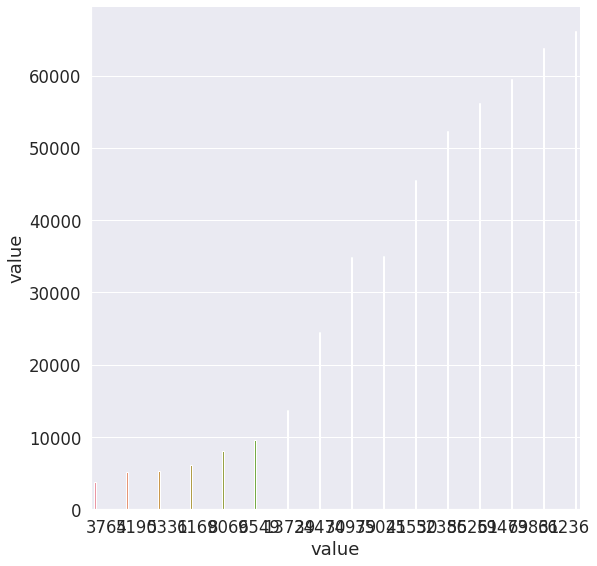

In [18]:
sns.factorplot(x = df2.iloc[:, 0], y = 'value', hue = 'value', data = df2, kind = 'bar', size = 8);
#Зависимая переменная распределена равномерно, что очень хорошо!

In [19]:
#Я так понимаю, еще раз, но разделим по тем кто болеет и тем кто не болеет
df3 = pd.melt(frame=df, value_vars=['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active'], id_vars=['cardio'])

In [20]:
df3.head()

,cardio,variable,value
0,0,gender,2
1,1,gender,1
2,1,gender,1
3,1,gender,2
4,0,gender,1


In [21]:
df3.groupby(['variable', 'value', 'cardio'])['value'].count().sort_index(level = [0, 1])

variable     value  cardio
active       0      0          6378
                    1          7361
             1      0         28643
                    1         27618
alco         0      0         33080
                    1         33156
             1      0          1941
                    1          1823
cholesterol  1      0         29330
                    1         23055
             2      0          3799
                    1          5750
             3      0          1892
                    1          6174
gender       1      0         22914
                    1         22616
             2      0         12107
                    1         12363
gluc         1      0         30894
                    1         28585
             2      0          2112
                    1          3078
             3      0          2015
                    1          3316
smoke        0      0         31781
                    1         32050
             1      0          3240
 

In [22]:
#Здесь не прокатывает перемена атрибутов и синтаксис rename отличается от урока!!!!!!
df4 = pd.DataFrame(
    df3.groupby(['variable', 'value', 'cardio'])['value'].count()
    .sort_index(level=[0,1])
    .rename(columns={'variable':'variable', 'value':'value', 'cardio':'count'}).reset_index());

TypeError: rename() got an unexpected keyword argument 'columns'

In [87]:
df3.groupby(['variable', 'value', 'cardio'])['value'].count().sort_index(level=[0,1])\
.rename(columns={'variable':'variable', 'value':'value', 'cardio':'cardio', 'NaN':'count'})

TypeError: rename() got an unexpected keyword argument 'columns'

In [88]:
df4 = pd.DataFrame(df3.groupby(['variable', 'value', 'cardio'])['value'].count().sort_index(level=[0,1])).\
rename(columns={'variable':'variable', 'value':'value', 'cardio':'count'})


In [89]:
df4.head(2)

value
variable value cardio       
active   0     0        6378
               1        7361

In [90]:
df4 = df4.rename(columns = {'variable':'variable', 'value':'value', 0:'count'})

In [91]:
sns.factorplot(x = 'variable', y = 'count', hue = 'value', col='cardio', data = df4, kind = 'bar', size = 9);
#Холестерин и глюкоза ведут себя по разному в разных группах.

/home/anton/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/anton/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


ValueError: Could not interpret input 'variable'

In [22]:
#Считаем статистику по всему DF
for c in df.columns:
    n = df[c].nunique()
    print(c)
    if n > 3:
        print(n)
    else:
        print(n, sorted(df[c].value_counts().to_dict().items()))
    print(50 * '-')

age
8076
--------------------------------------------------
gender
2 [(1, 45530), (2, 24470)]
--------------------------------------------------
height
109
--------------------------------------------------
weight
287
--------------------------------------------------
ap_hi
153
--------------------------------------------------
ap_lo
157
--------------------------------------------------
cholesterol
3 [(1, 52385), (2, 9549), (3, 8066)]
--------------------------------------------------
gluc
3 [(1, 59479), (2, 5190), (3, 5331)]
--------------------------------------------------
smoke
2 [(0, 63831), (1, 6169)]
--------------------------------------------------
alco
2 [(0, 66236), (1, 3764)]
--------------------------------------------------
active
2 [(0, 13739), (1, 56261)]
--------------------------------------------------
cardio
2 [(0, 35021), (1, 34979)]
--------------------------------------------------


In [23]:
df.head(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1


## Первая часть

In [24]:
#По среднему росту быстро определим, что gender_1 - female, gender_2 - male
# 1_ОТВЕТ: "1" - мужчин 24470, женщин 45530
df.groupby('gender')['height'].mean()

gender
1    161.355612
2    169.947895
Name: height, dtype: float64

In [25]:
# 2_ОТВЕТ: "2" - мужчины сообщают об употреблении чаще
df.groupby('gender')['alco'].value_counts()

gender  alco
1       0       44369
        1        1161
2       0       21867
        1        2603
Name: alco, dtype: int64

In [26]:
df[(df.smoke == 1)&(df.gender == 1)]['gender'].count() - df[(df.smoke == 1)&(df.gender == 2)]['gender'].count()

-4543

In [27]:
df[(df.gender == 1)]['smoke'].value_counts(normalize=True)[1]

0.017856358444981332

In [28]:
# 3_ОТВЕТ: "3" - 20%
(df[(df.gender == 2)]['smoke'].value_counts(normalize=True)[1] - \
 df[(df.gender == 1)]['smoke'].value_counts(normalize=True)[1]) * 100

20.102390309976737

In [29]:
# 4_ОТВЕТ: "4" - 20 месяцев
round(abs((df[(df.smoke == 1)]['age'].median() - df[(df.smoke == 0)]['age'].median()) / 365.25) * 12)

20

## Вторая часть

In [30]:
#Отбираем тех у кого средний возраст 60-65 лет, включительно
#Создаем атрибут age_years
df['age_years'] = round(df['age'] / 365.25).astype('int64')

In [31]:
df.query('60 <= age_years < 65')[df.cholesterol == 1]['cardio'].value_counts()[1] / \
df.query('60 <= age_years < 65')[df.cholesterol == 3]['cardio'].value_counts()[1]
#Такой вариант норм, но ругается чего-то
                                                                              

/tmp/ipykernel_48129/3431174712.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.query('60 <= age_years < 65')[df.cholesterol == 1]['cardio'].value_counts()[1] / \
/tmp/ipykernel_48129/3431174712.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.query('60 <= age_years < 65')[df.cholesterol == 3]['cardio'].value_counts()[1]


2.7067410905968226

In [32]:
# 5ОТВЕТ: "3" - в 3 раза отличаются показатели
# Посчитал неверно!!! Спрашивалось не про чистые величины а про проценты и давление надо учитывать!
df[(df.age_years >= 60)&(df.age_years < 65)&(df.cholesterol==1)\
         &(df.cardio==1)]['cardio'].value_counts() /\
df[(df.age_years >= 60)&(df.age_years < 65)&(df.cholesterol==3)\
   &(df.cardio==1)]['cardio'].value_counts()

1    2.706741
Name: cardio, dtype: float64

In [33]:
df9 = pd.eval('imt = df.weight / ((df.height / 100) ** 2)', target=df)

In [34]:
# 6_1ОТВЕТ: медиана ИМТ больше нормы!
df9['imt'].median()

26.374068120774975

In [35]:
# 6_2ОТВЕТ: да - ИМТ женщин в среднем выше чем у мужчин
df9.query('gender == 1')['imt'].mean() - df9.query('gender == 2')['imt'].mean()

1.2331410845434938

In [36]:
# 6_3ОТВЕТ: нет - ИМТ здоровых в среднем меньше ИМТ болеющих ССЗ
df9.query('cardio == 1')['imt'].mean() - df9.query('cardio == 0')['imt'].mean()

2.01788542022085

In [37]:
#ИМТ здоровых непьющих мужчин
df9[(df9.cardio==0)&(df9.alco==0)&(df9.gender==2)]['imt'].mean()

25.87263807546017

In [38]:
# 6_4ОТВЕТ: - да ИМТ здор неп мужч ближе к норме, чем здор неп женщин!
#ИМТ здоровых непьющих женщин
df9[(df9.cardio==0)&(df9.alco==0)&(df9.gender==1)]['imt'].mean()

26.845406594131507

## Очистка данных

In [39]:
df.head(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55


In [40]:
df.query('ap_hi >= ap_lo')

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,53
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,62
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52


In [41]:
df[df.ap_lo < df.ap_hi]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,53
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,62
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52


In [42]:
#1.Выкинем данные, где верхнее давление ниже нижнего
df_clear = df.query('ap_hi >= ap_lo')

In [43]:
# Квантиль 0.025 - это 2.5 процентиля! Соответственно 0.5 - 50 проц, 0.25 - 25 проц, 0.75 - 75 проц. И 0.975 - 97.5 процентилей 
df_clear['height'].quantile(.025)

150.0

In [44]:
df_clear['height'].quantile(.975)

180.0

In [45]:
df_clear['weight'].quantile(.025)

51.0

In [46]:
df_clear['weight'].quantile(.975)

107.0

In [47]:
#АККУРАТНЕЕ И ВНИМАТЕЛЬНЕЕ с < & <=; > & >=!!! Точно будут ловить!!!
df_clear = df_clear.query('150.0 <= height <= 180')
df_clear = df_clear.query('51.0 <= weight <= 107.0')

In [48]:
#% который мы выбросили (100 минус отношение чистого DF ко всему DF) 
# 7_ОТВЕТ: "3" - 10% мы выбросили из начальных данных
100 - round((df_clear.shape[0] / df.shape[0]) * 100) 

10

In [49]:
# Ну или так, тоже самое, но вроде так правильнее
round(((df.shape[0] - df_clear.shape[0]) / df.shape[0]) * 100) 

10

## Визуализация

In [50]:
#Матрица корреляции, удаляем нечисловые колонки (или формируем матрицу только по числовым)
df.info() # А таких нет)))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
 12  age_years    70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 9.5 MB


In [51]:
df_corrmatrix = df.corr()

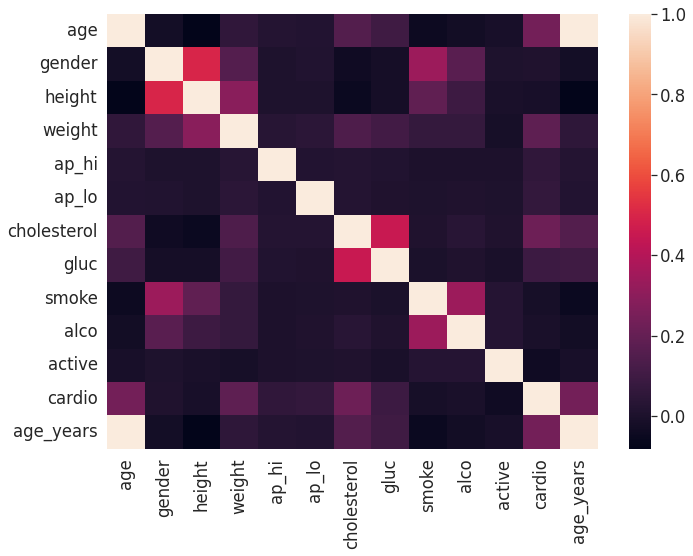

In [52]:
#А теперь по ней тепловую матрицу (КОРРЕЛЯЦИЯ ПИРСОНА)
# 8_ОТВЕТ: "2" - Пара Рост + Смок - наиболее зависимы с полом
sns.heatmap(df_corrmatrix);

In [53]:
#Так с прописыванием Пирсона, но выглядит одинаково!!!
df_corrmatrix_P = df.corr(method='pearson')

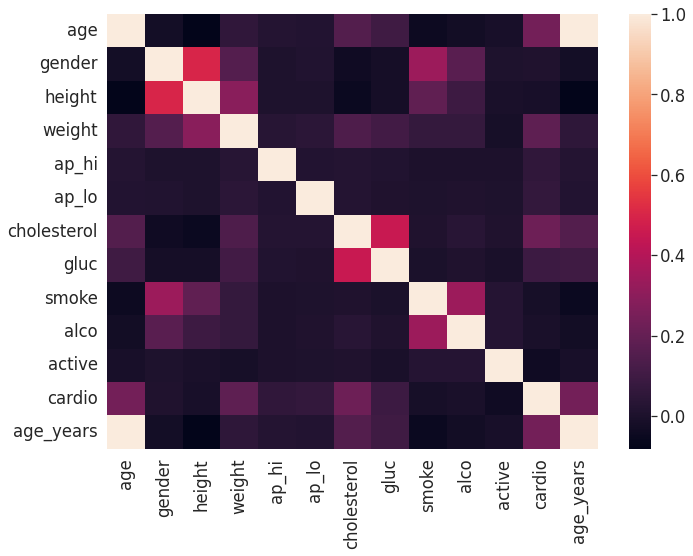

In [54]:
sns.heatmap(df_corrmatrix_P);

In [55]:
df.head(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55


   height variable  value
0     168   gender      2
1     156   gender      1
2     165   gender      1


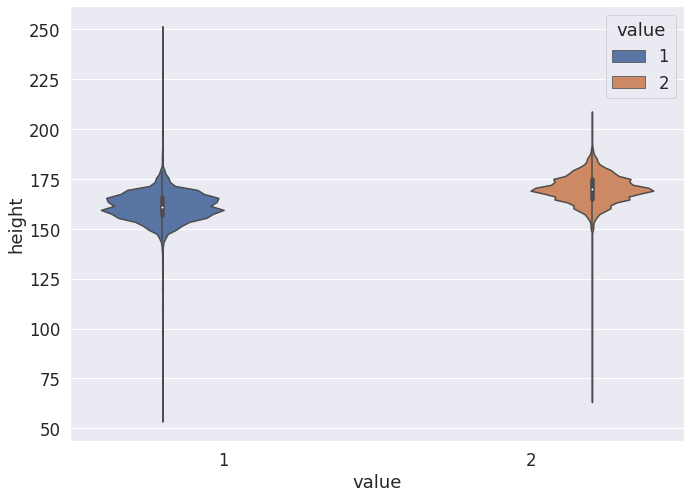

In [56]:
#Так плохо, т.к. ХУЕ получается ВАЛУЕ, а это не понятно, надо бы ГЕНДЕР
heig_gen = pd.melt(df, id_vars='height', value_vars='gender')
print(heig_gen.head(3))
sns.violinplot(x='value', y='height', hue='value', data=heig_gen);

In [57]:
#График тот-же, но приятное обозначение шкал, понятно что 1 и 2 это пол и 2 - это мужчины!
gen_heig = pd.melt(df, id_vars='gender', value_vars='height')
gen_heig.columns = ['Пол', 'доп', 'Рост']
print(gen_heig.head(3))

   Пол     доп  Рост
0    2  height   168
1    1  height   156
2    1  height   165


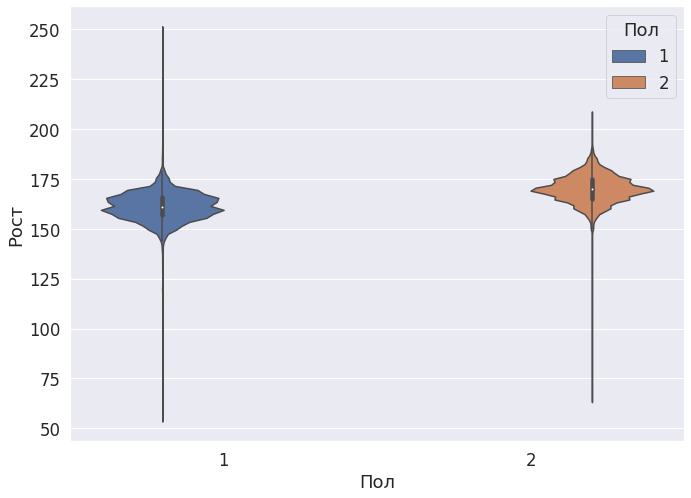

In [58]:
#Вроде норм, но на что scale действует непонятно!
sns.violinplot(x='Пол', y='Рост', hue='Пол', data=gen_heig, scale_hue='area');

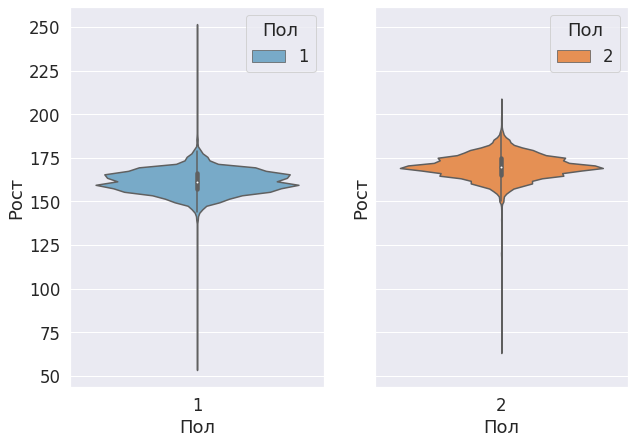

In [59]:
#Можно еще так, на 2 графика
gen_heig_1 = gen_heig[gen_heig.Пол==1]
gen_heig_2 = gen_heig[gen_heig.Пол==2]

_, axes = plt.subplots(1, 2, sharey = True, figsize=(10, 7))
sns.violinplot(x='Пол', y='Рост', hue='Пол', data=gen_heig_1, scale='area', ax=axes[0], palette='Blues');
sns.violinplot(x='Пол', y='Рост', hue='Пол', data=gen_heig_2, scale='area', ax=axes[1], palette='Oranges');

In [60]:
#Так с прописыванием Спирмана!!!
df_corrmatrix_S = df.corr(method='spearman')

In [61]:
df_corrmatrix_S

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
age,1.000000,-0.020176,-0.082292,0.061559,0.219087,0.156700,0.140113,0.091791,-0.047471,-0.030078,-0.010422,0.234429,0.998088
gender,-0.020176,1.000000,0.533805,0.172480,0.063174,0.066374,-0.035730,-0.018866,0.338135,0.170966,0.005866,0.008109,-0.020636
height,-0.082292,0.533805,1.000000,0.313569,0.019381,0.030534,-0.058940,-0.024369,0.197632,0.096670,-0.007367,-0.012383,-0.083594
weight,0.061559,0.172480,0.313569,1.000000,0.277749,0.254420,0.137908,0.109901,0.071676,0.068088,-0.014894,0.182701,0.062956
ap_hi,0.219087,0.063174,0.019381,0.277749,1.000000,0.735436,0.208722,0.105334,0.028929,0.033243,-0.001268,0.451885,0.220663
ap_lo,0.156700,0.066374,0.030534,0.254420,0.735436,1.000000,0.167401,0.082474,0.026172,0.038862,0.003401,0.362572,0.157794
cholesterol,0.140113,-0.035730,-0.058940,0.137908,0.208722,0.167401,1.000000,0.407803,0.015220,0.041285,0.007573,0.215117,0.141957
gluc,0.091791,-0.018866,-0.024369,0.109901,0.105334,0.082474,0.407803,1.000000,0.000468,0.018584,-0.008610,0.091488,0.091661
smoke,-0.047471,0.338135,0.197632,0.071676,0.028929,0.026172,0.015220,0.000468,1.000000,0.340094,0.025858,-0.015486,-0.047532
alco,-0.030078,0.170966,0.096670,0.068088,0.033243,0.038862,0.041285,0.018584,0.340094,1.000000,0.025476,-0.007330,-0.029978


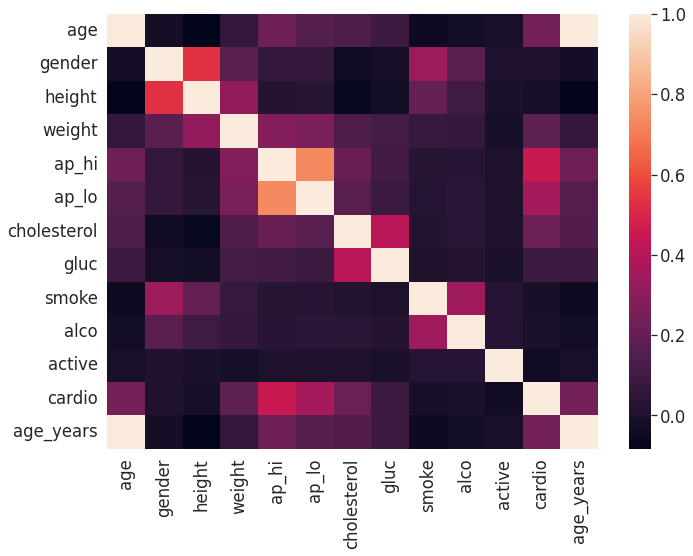

In [62]:
# 9_ОТВЕТ: "5" - По Спирману максимальная кореляция у пары ap_hi/ap_lo
# 10_ОТВЕТ: "3" - Природа данных!
sns.heatmap(df_corrmatrix_S);

In [63]:
df.head(3)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52


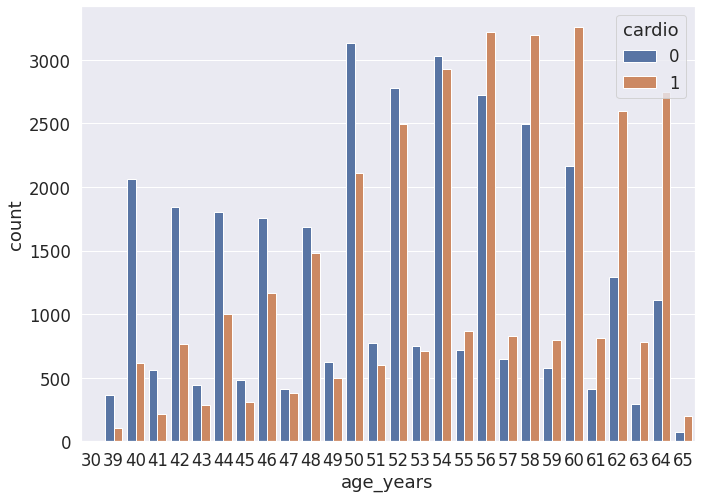

In [64]:
# 11_ОТВЕТ: "2" - 55лет первый возраст, в котором число людей с ССЗ превышает число людей без ССЗ
sns.countplot(x='age_years', hue='cardio', data=df);